In [1]:
!mkdir data
!wget https://www.dropbox.com/s/cw23exa4cij8lz7/titanic.csv?dl=0 -O data/titanic.csv

--2023-04-17 21:34:23--  https://www.dropbox.com/s/cw23exa4cij8lz7/titanic.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/cw23exa4cij8lz7/titanic.csv [following]
--2023-04-17 21:34:24--  https://www.dropbox.com/s/raw/cw23exa4cij8lz7/titanic.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7c0922da4a78ba6cb44fade1d4.dl.dropboxusercontent.com/cd/0/inline/B6UMD9R4rk1rizRArfIShqhGlym8GFncgJ4f7ipqQ8PUX96P19-49f0WPoXxF54C2_okL_vwAb-Mx_McIu3YbBtPfMWVAbiQjJxYZ7yxbUi9Z6mX5B6ySor3_tXpgR7vMFTHSbj265WrrcVVNAizjGUN6aWNqkNxqmZem9Z63RFgKg/file# [following]
--2023-04-17 21:34:24--  https://uc7c0922da4a78ba6cb44fade1d4.dl.dropboxusercontent.com/cd/0/inline/B6UMD9R4rk1rizRArfIShqhGlym8GFncgJ4f7ipqQ8PUX96P19-49f0WPoXxF54C2_okL_vwAb-

# Visualizig Tables: Titanic


## Reading datatest

![](images/titanic.png)

In [2]:
import pandas as pd
import numpy as np

data =  pd.read_csv('data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Computing Attributes

In [3]:
data['FamilySize'] = data ['SibSp'] + data['Parch'] + 1

data['isAlone'] = 1 #initialize to yes/1 is alone
data.loc[data['FamilySize'] > 1,'isAlone'] = 0 # now update to no/0 if family size is greater than 1
data['Who'] = data['Sex'] #initialize to sex
data['isChild'] = 0 #initialize is child
data.loc[data['Age']<=16,'Who'] = 'child'
data.loc[data['Age']<=16,'isChild'] = 1



data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  isAlone      891 non-null    int64  
 14  Who          891 non-null    object 
 15  isChild      891 non-null    int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 111.5+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone,Who,isChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,male,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,female,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,female,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,male,0


## Survival rate analyasis


Let's just use the powerful [barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) function in Seaborn for an analysis of the survival rate:

<Axes: xlabel='Embarked', ylabel='Survived'>

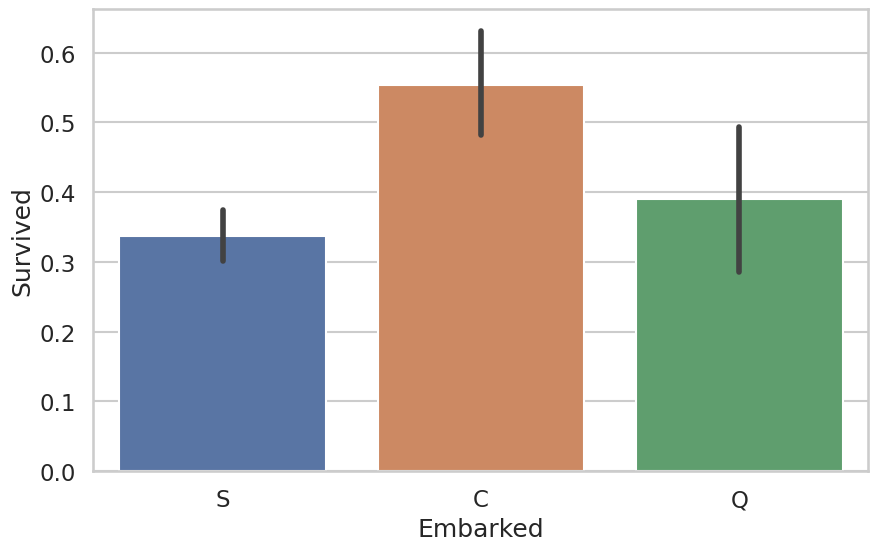

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context='talk', style="whitegrid", rc={'figure.figsize':[10,6]})
sns.barplot(x ='Embarked', y = 'Survived', data=data) 

We can remove the vertical bars (i.e., error bars):

<ipython-input-5-2a1996eaf426>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x ='Embarked', y = 'Survived', data=data, ci=None)


<Axes: xlabel='Embarked', ylabel='Survived'>

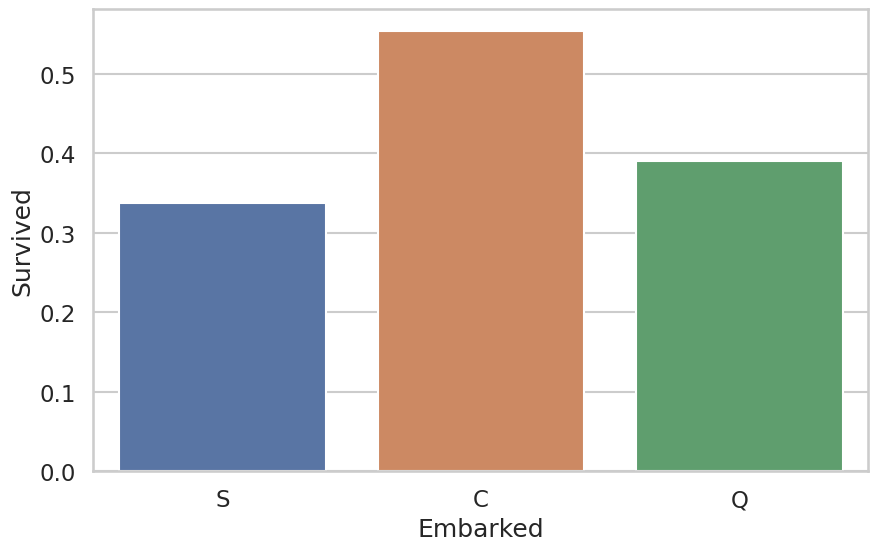

In [5]:
sns.barplot(x ='Embarked', y = 'Survived', data=data, ci=None) 

Is survival rate dependent by sex or being a child?

<ipython-input-6-b7cf6f125db7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x ='Embarked', y = 'Survived', hue='isChild', data=data, ci=None)


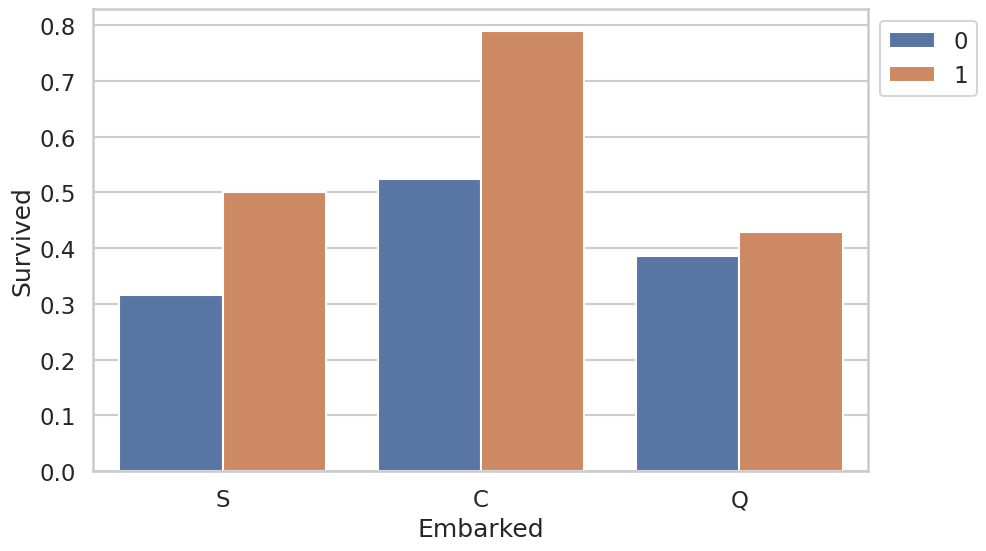

In [6]:
sns.barplot(x ='Embarked', y = 'Survived', hue='isChild', data=data, ci=None)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<ipython-input-7-325a97bff37d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x ='Embarked', y = 'Survived', hue='Who', data=data, ci=None)


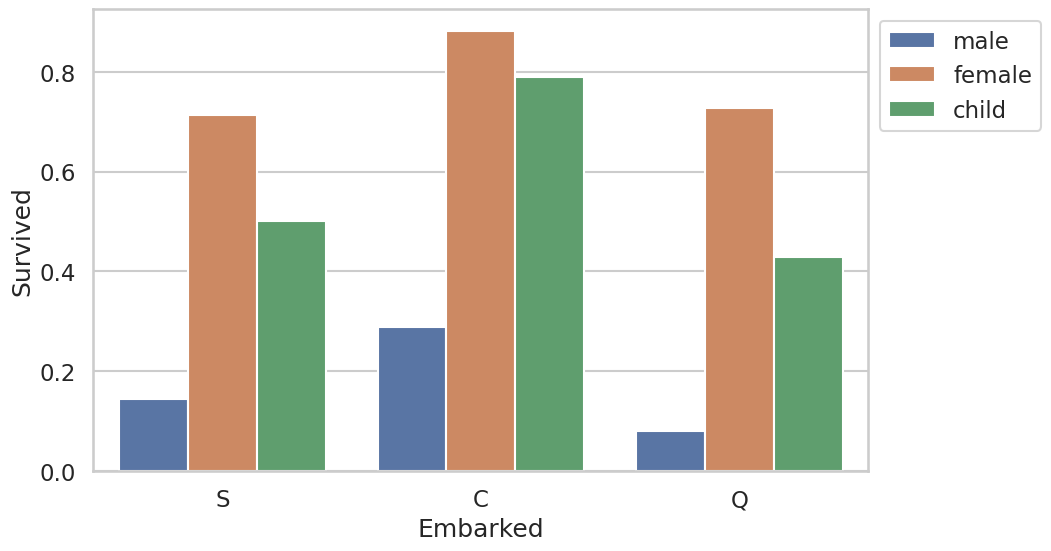

In [7]:
sns.barplot(x ='Embarked', y = 'Survived', hue='Who', data=data, ci=None)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

Let's do the same for ticket class:

<ipython-input-8-25852ff40776>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x ='Pclass', y = 'Survived', hue='Sex', data=data, ci=None)


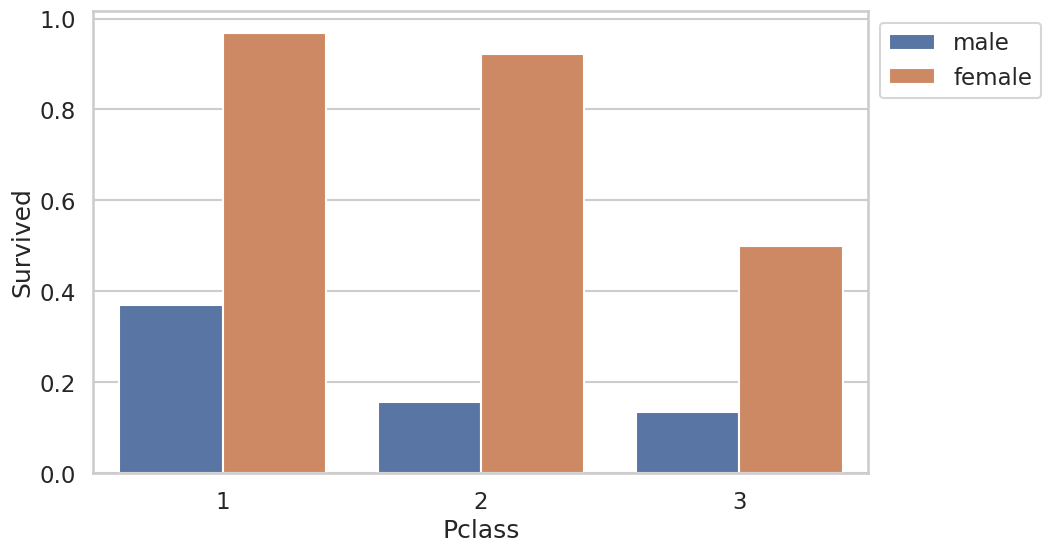

In [8]:
sns.barplot(x ='Pclass', y = 'Survived', hue='Sex', data=data, ci=None)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<ipython-input-9-4aac4f8321f0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x ='Pclass', y = 'Survived', hue='Who', data=data, ci=None)


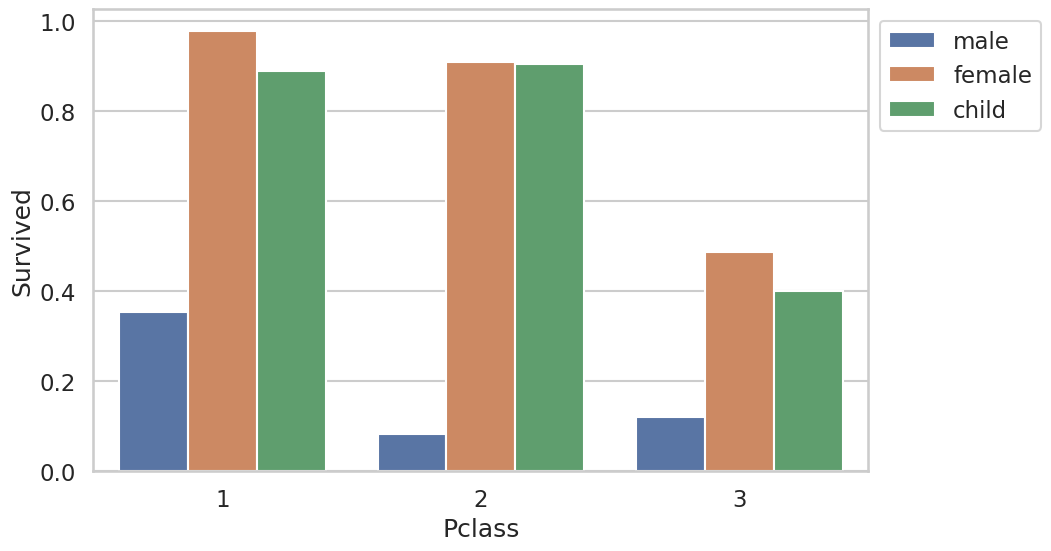

In [9]:
sns.barplot(x ='Pclass', y = 'Survived', hue='Who', data=data, ci=None)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

Can we see trends? Let's use [pointplot()](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) function:

<ipython-input-10-f531a22101d6>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x ='Pclass', y = 'Survived', hue='Who', data=data, ci=None)


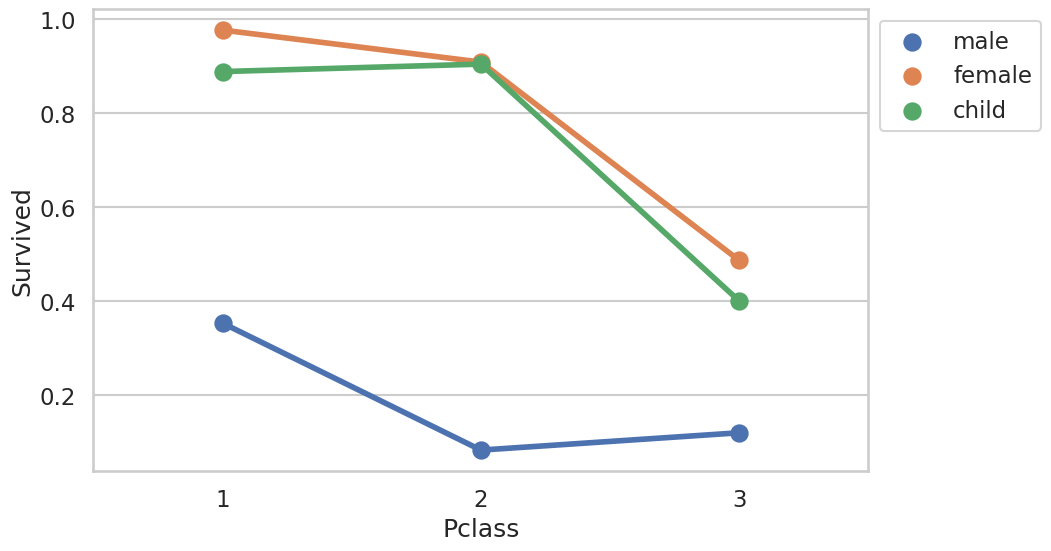

In [10]:
sns.pointplot(x ='Pclass', y = 'Survived', hue='Who', data=data, ci=None)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

Let's do the same for family size?

<ipython-input-11-2ead68a5ad23>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x ='FamilySize', y = 'Survived', data=data, ci=None)


<Axes: xlabel='FamilySize', ylabel='Survived'>

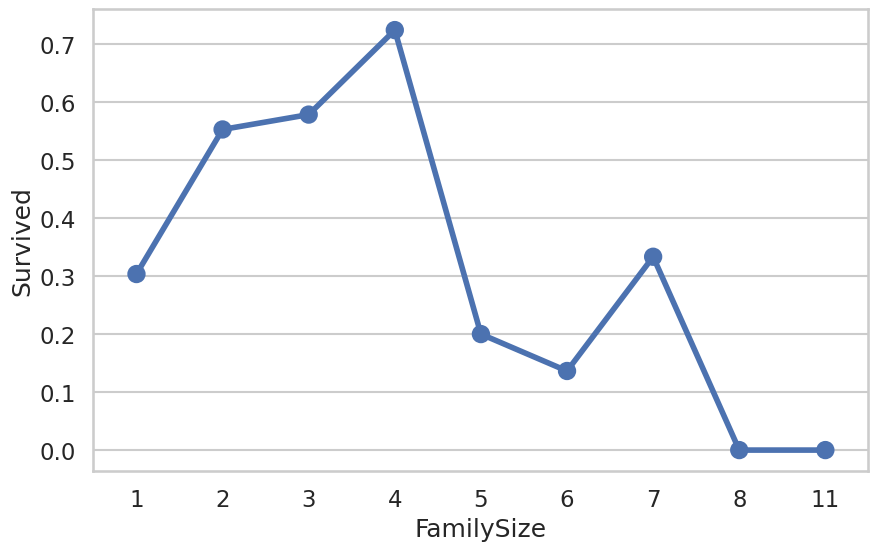

In [11]:
sns.pointplot(x ='FamilySize', y = 'Survived', data=data, ci=None)
#plt.legend(bbox_to_anchor=(1, 1), loc=2)

## Who survived?

Ok, but let sse at the actual number of survivors:

<ipython-input-12-34aefb429142>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = data.groupby(factor,as_index=False).sum()


<BarContainer object of 3 artists>

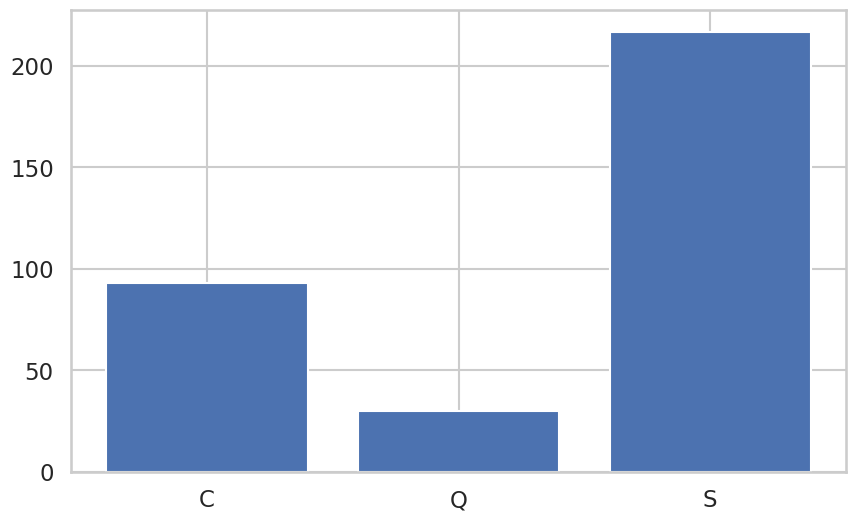

In [12]:
factor='Embarked'
d = data.groupby(factor,as_index=False).sum()
d.head()
plt.bar(x=d[factor],height=d['Survived'])

<ipython-input-13-a835bb868f2f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = data.groupby(factor,as_index=False).sum()


<BarContainer object of 3 artists>

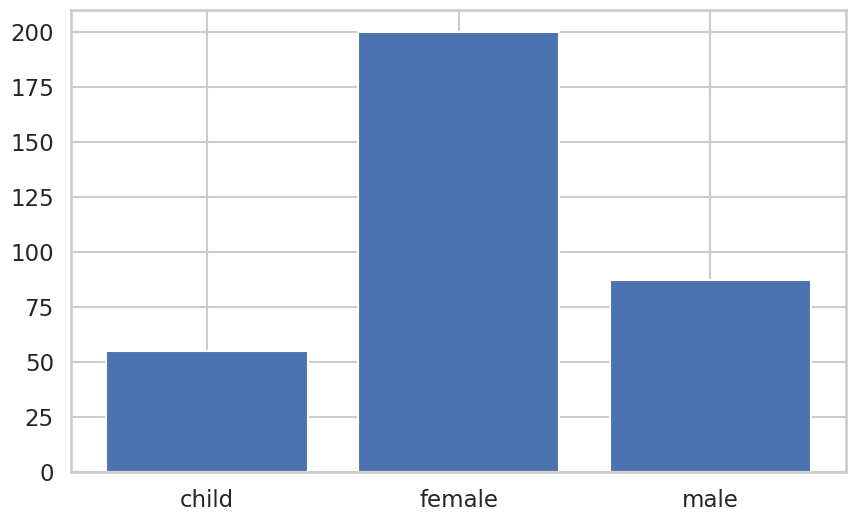

In [13]:
factor='Who'
d = data.groupby(factor,as_index=False).sum()
plt.bar(x=d[factor],height=d['Survived'])

<ipython-input-14-c715005ec939>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = data.groupby(factor,as_index=False).mean()


<BarContainer object of 3 artists>

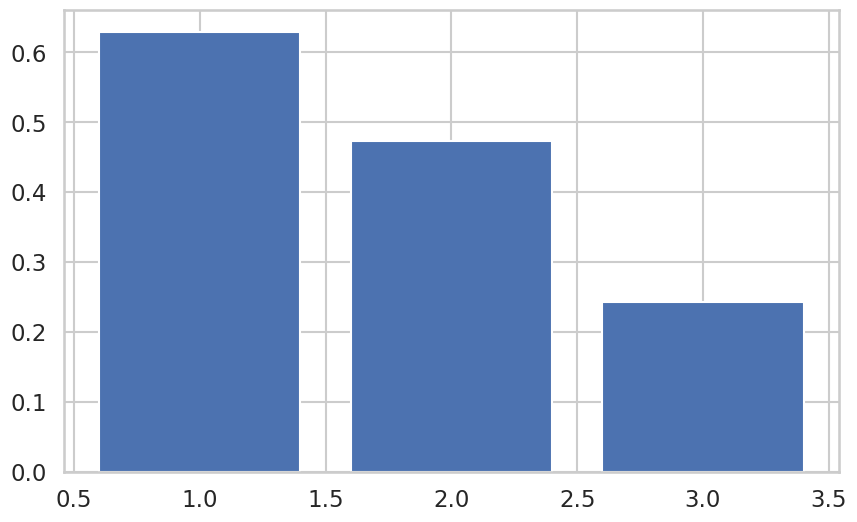

In [14]:
factor='Pclass'
d = data.groupby(factor,as_index=False).mean()
plt.bar(x=d[factor],height=d['Survived'])

<ipython-input-15-c4021317d5e9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = data.groupby(factor,as_index=False).mean()


([<matplotlib.axis.XTick at 0x7f19759b8dc0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

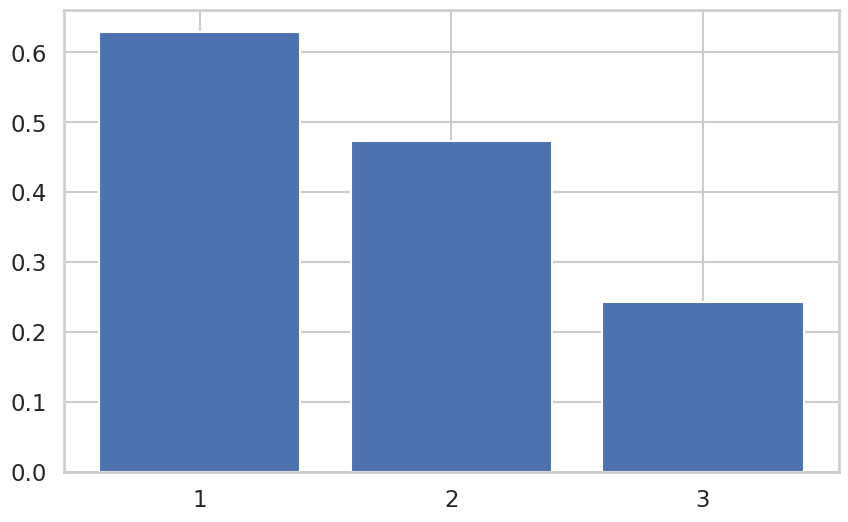

In [15]:
factor='Pclass'
d = data.groupby(factor,as_index=False).mean()
plt.bar(x=d[factor],height=d['Survived'])
plt.xticks([1,2,3])

Let's see the composition (men, women and children) of the groups:

In [16]:
factor='Embarked'
d = data.groupby([factor,'Survived'],as_index=False).count()
d.head()

,Embarked,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,isAlone,Who,isChild
0,C,0,75,75,75,75,51,75,75,75,75,17,75,75,75,75
1,C,1,93,93,93,93,79,93,93,93,93,52,93,93,93,93
2,Q,0,47,47,47,47,20,47,47,47,47,2,47,47,47,47
3,Q,1,30,30,30,30,8,30,30,30,30,2,30,30,30,30
4,S,0,427,427,427,427,353,427,427,427,427,49,427,427,427,427


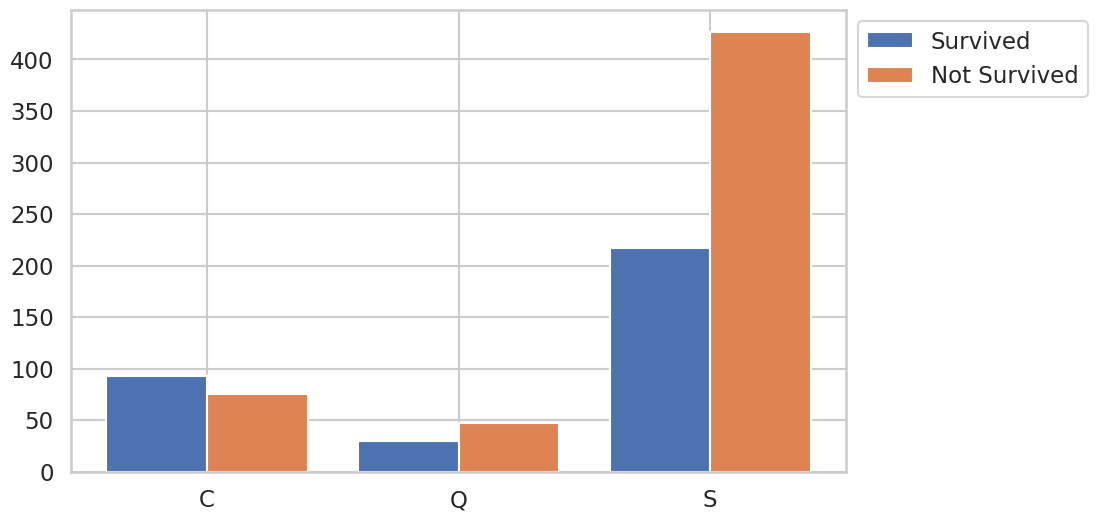

In [17]:
factor='Embarked'
d = data.groupby([factor,'Survived'],as_index=False).count()
width = 0.4
x = np.array([1,2,3])
y1 = d[d.Survived==1]['Name']
y2 = d[d.Survived==0]['Name']

plt.bar(x=x, height=y1,width=width, label = 'Survived')
plt.bar(x=x+width, height=y2, width=width, label = 'Not Survived')
plt.xticks([1.2,2.2,3.2],['C','Q','S'])
plt.legend(bbox_to_anchor=(1, 1), loc=2)

Let's make a stacked bar:

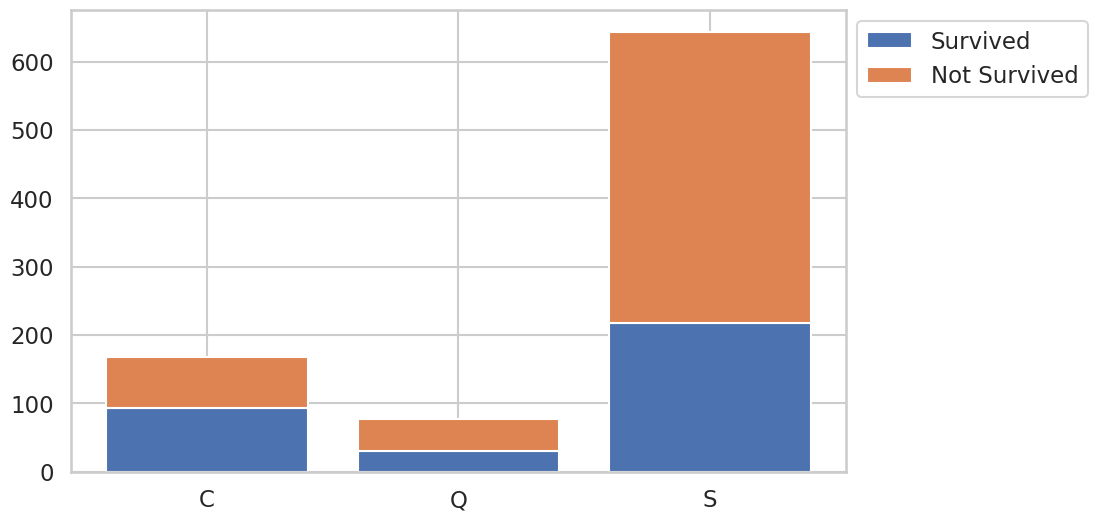

In [18]:
factor='Embarked'
d = data.groupby([factor,'Survived'],as_index=False).count()
x = d[factor].unique()
y1 = d[d.Survived==1]['Name']
y2 = d[d.Survived==0]['Name']

plt.bar(x=x, height=y1, label = 'Survived')
plt.bar(x=x, height=y2, bottom=y1, label = 'Not Survived')
plt.legend(bbox_to_anchor=(1, 1), loc=2)


Ok, now let's make a more interesting analysis: men, women and childrein survivors for each ticket class:

<ipython-input-19-337e65249d21>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = data.groupby([factor,'Who'],as_index=False).sum()


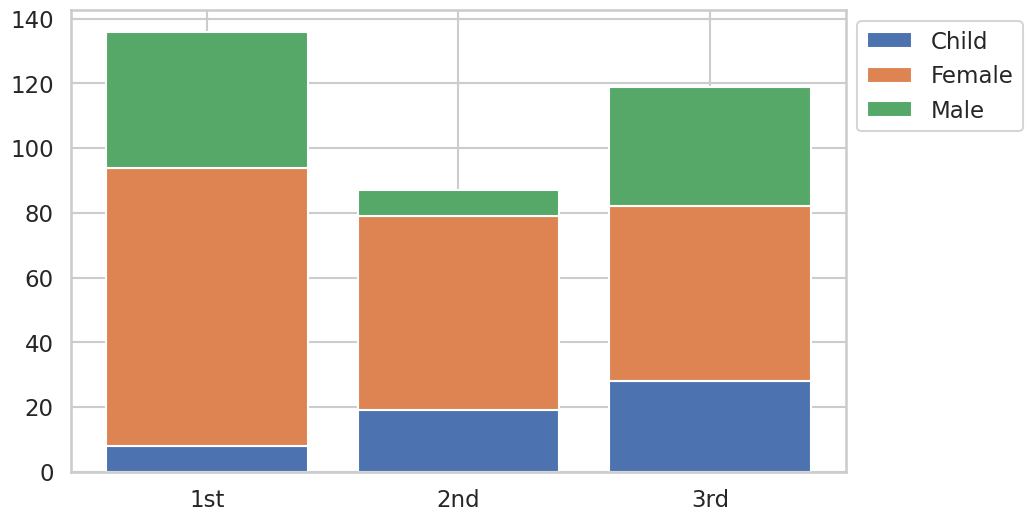

In [19]:
factor='Pclass'
d = data.groupby([factor,'Who'],as_index=False).sum()
x = d[factor].unique()
y1 = d[d.Who=='child']['Survived'].values
y2 = d[d.Who=='female']['Survived'].values
y3 = d[d.Who=='male']['Survived'].values

plt.bar(x=x, height=y1, label = 'Child')
plt.bar(x=x, height=y2, bottom=y1, label = 'Female')
plt.bar(x=x, height=y3, bottom=y2+y1, label = 'Male')
plt.xticks([1,2,3],['1st','2nd','3rd'])
plt.legend(bbox_to_anchor=(1, 1), loc=2)

Changing orientation, using [barh()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh):

<ipython-input-20-1934fe67cec2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = data.groupby([factor,'Who'],as_index=False).sum()


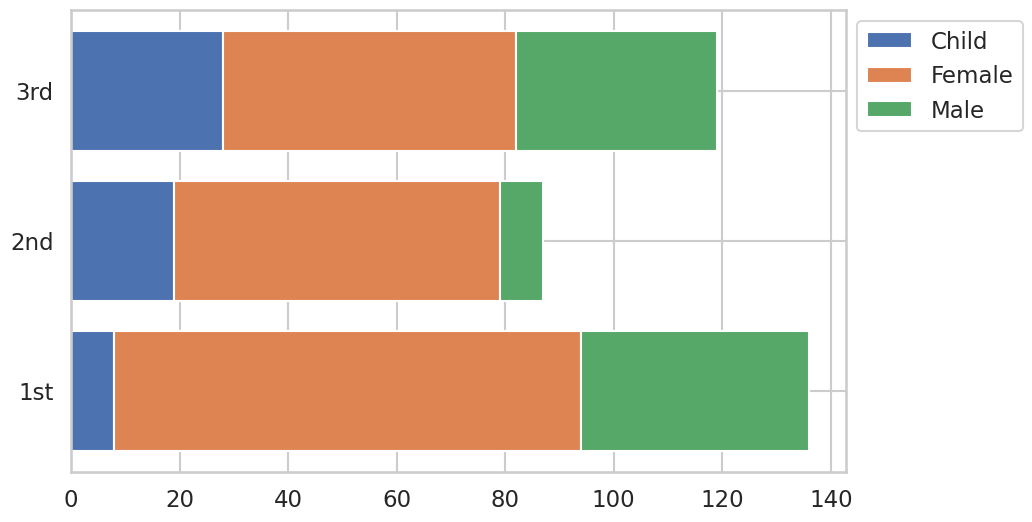

In [20]:
factor='Pclass'
d = data.groupby([factor,'Who'],as_index=False).sum()
y = d[factor].unique()
x1 = d[d.Who=='child']['Survived'].values
x2 = d[d.Who=='female']['Survived'].values
x3 = d[d.Who=='male']['Survived'].values

plt.barh(y=y, width=x1, label = 'Child')
plt.barh(y=y, width=x2, left=x1, label = 'Female')
plt.barh(y=y, width=x3, left=x2+x1, label = 'Male')
plt.yticks([1,2,3],['1st','2nd','3rd'])
plt.legend(bbox_to_anchor=(1, 1), loc=2)

We don't see the count of non survived and this might be misleading, let's encode everything with stacked bars:

<ipython-input-21-b7ea3856ea87>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  surv = data.groupby([factor,'Who'],as_index=False).sum()


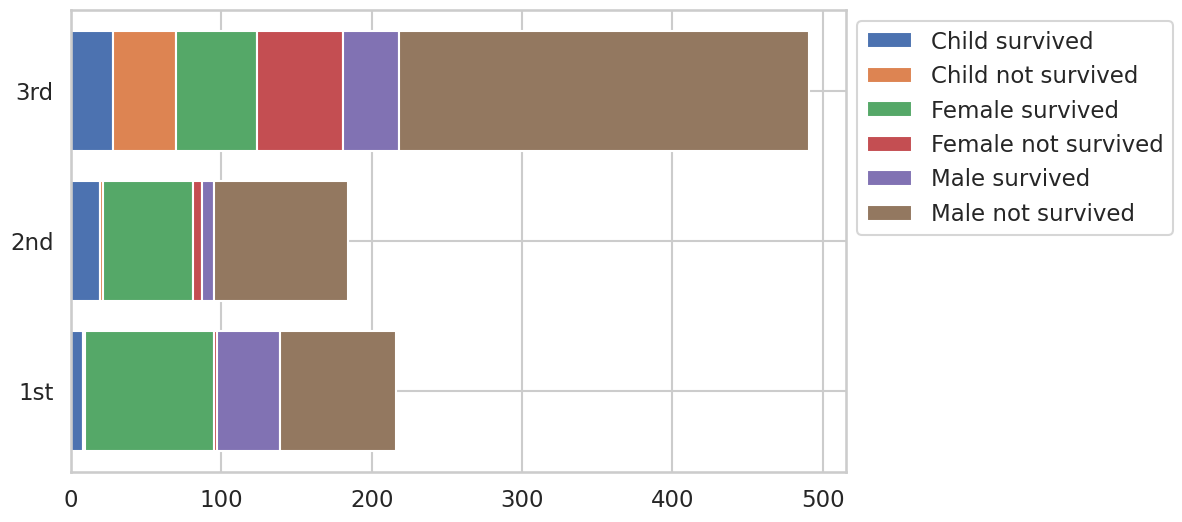

In [21]:
factor='Pclass'
total = data.groupby([factor,'Who'],as_index=False).count()
surv = data.groupby([factor,'Who'],as_index=False).sum()
y = d[factor].unique()
x1s = surv[surv.Who=='child']['Survived'].values
x2s = surv[surv.Who=='female']['Survived'].values
x3s = surv[surv.Who=='male']['Survived'].values
x1ns = total[total.Who=='child']['Survived'].values - surv[d.Who=='child']['Survived'].values
x2ns = total[total.Who=='female']['Survived'].values - surv[d.Who=='female']['Survived'].values
x3ns = total[total.Who=='male']['Survived'].values - surv[d.Who=='male']['Survived'].values
left1 = x1s+x1ns
left2 = left1+x2s+x2ns

plt.barh(y=y, width=x1s, label = 'Child survived')
plt.barh(y=y, width=x1ns, left=x1s, label = 'Child not survived')
plt.barh(y=y, width=x2s, left=left1, label = 'Female survived')
plt.barh(y=y, width=x2ns, left=left1+x2s, label = 'Female not survived')
plt.barh(y=y, width=x3s, left=left2, label = 'Male survived')
plt.barh(y=y, width=x3ns, left=left2+x3s, label = 'Male not survived')

plt.yticks([1,2,3],['1st','2nd','3rd'])
plt.legend(bbox_to_anchor=(1, 1), loc=2)

Try to improve readability with a bivariate colormap:

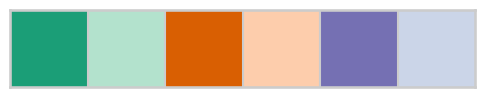

In [22]:
mycolormap = sns.color_palette(['#1b9e77','#b3e2cd','#d95f02','#fdcdac','#7570b3','#cbd5e8'])
sns.palplot(mycolormap)  #Mixed 3-class Dark2 with 3-class Pastel2 from Color Brewer
sns.set_palette(mycolormap)

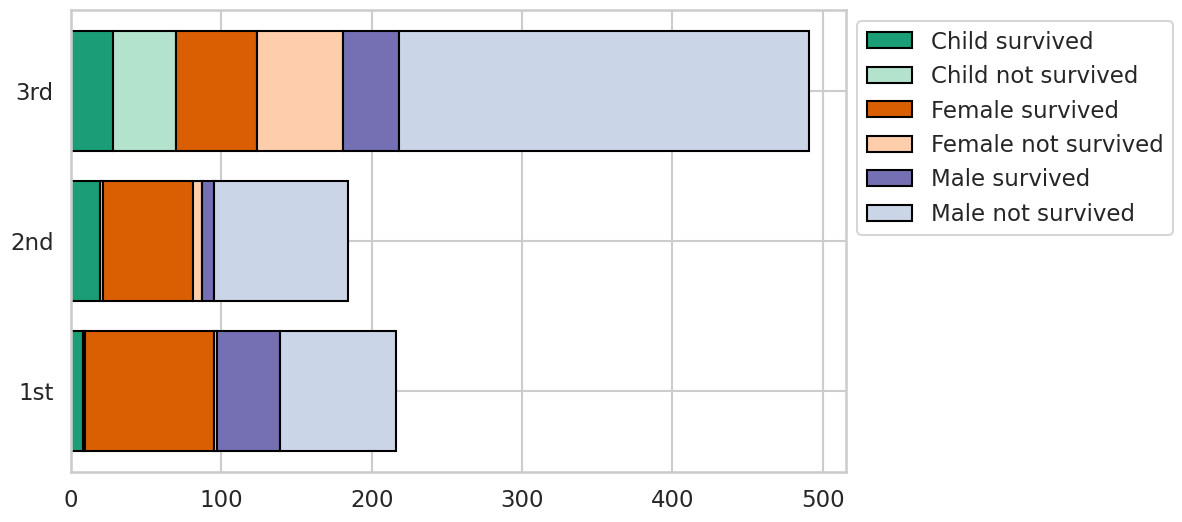

In [23]:
plt.barh(y=y, width=x1s, label = 'Child survived', edgecolor='black')
plt.barh(y=y, width=x1ns, left=x1s, label = 'Child not survived', edgecolor='black')
plt.barh(y=y, width=x2s, left=left1, label = 'Female survived',edgecolor='black')
plt.barh(y=y, width=x2ns, left=left1+x2s, label = 'Female not survived',edgecolor='black')
plt.barh(y=y, width=x3s, left=left2, label = 'Male survived',edgecolor='black')
plt.barh(y=y, width=x3ns, left=left2+x3s, label = 'Male not survived',edgecolor='black')

plt.yticks([1,2,3],['1st','2nd','3rd'])
plt.legend(bbox_to_anchor=(1, 1), loc=2)

However it is still diffult to read, so let's just focus on males and females:

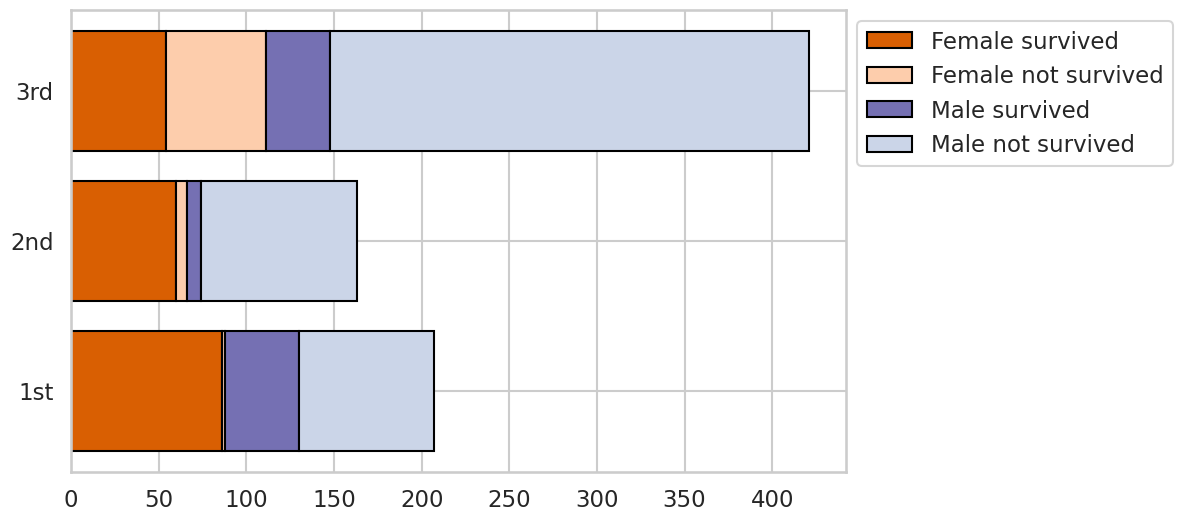

In [24]:
mycolormap = sns.color_palette(['#d95f02','#fdcdac','#7570b3','#cbd5e8']) #Removed one class
sns.set_palette(mycolormap)

left=x2s+x2ns

plt.barh(y=y, width=x2s, label = 'Female survived', edgecolor='black')
plt.barh(y=y, width=x2ns, left=x2s, label = 'Female not survived', edgecolor='black')
plt.barh(y=y, width=x3s, left=left, label = 'Male survived', edgecolor='black')
plt.barh(y=y, width=x3ns, left=left+x3s, label = 'Male not survived', edgecolor='black')

plt.yticks([1,2,3],['1st','2nd','3rd'])
plt.legend(bbox_to_anchor=(1, 1), loc=2)

What if we want to focus on comparing also male survived or not on for each ticket class?

([<matplotlib.axis.XTick at 0x7f19752d0d60>,
 [Text(-300, 0, '300'),
  Text(-200, 0, '200'),
  Text(-100, 0, '100'),
  Text(0, 0, '0'),
  Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(300, 0, '300')])

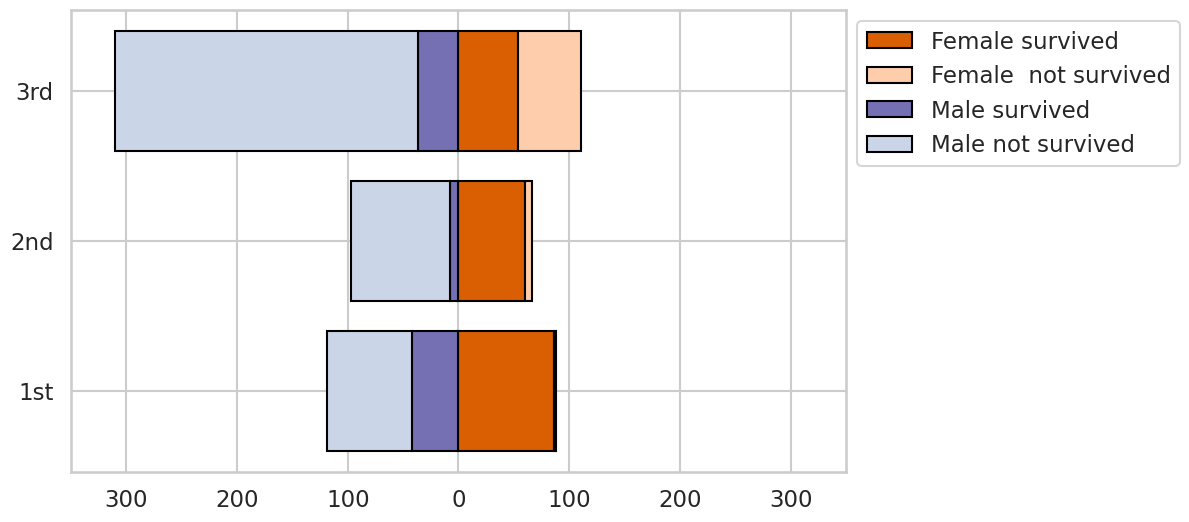

In [25]:
fig, ax = plt.subplots()
plt.barh(y=y, width=x2s, label = 'Female survived', color='#d95f02', edgecolor='black')
plt.barh(y=y, width=x2ns, left=x2s, label = 'Female  not survived', color='#fdcdac', edgecolor='black')
plt.barh(y=y, width=-x3s, label = 'Male survived', color='#7570b3', edgecolor='black')
plt.barh(y=y, width=-x3ns, left=-x3s, label = 'Male not survived', color='#cbd5e8', edgecolor='black')
ax.set_xlim(-350,350)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.yticks([1,2,3],['1st','2nd','3rd'])
plt.xticks([-300, -200, -100, 0, 100, 200, 300],[300, 200, 100, 0, 100, 200, 300])

## Heatmaps

The [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap) is an alternative way to visualize survival with respect to a pair of factors. 
But, first we need to organize data with [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html):

In [26]:
matrix = data.pivot_table( index='Pclass', columns='Who', values='Survived' )

matrix.head()

Who,child,female,male
Pclass,,,
1,0.888889,0.977273,0.352941
2,0.904762,0.909091,0.082474
3,0.400000,0.486486,0.119355


<Axes: xlabel='Who', ylabel='Pclass'>

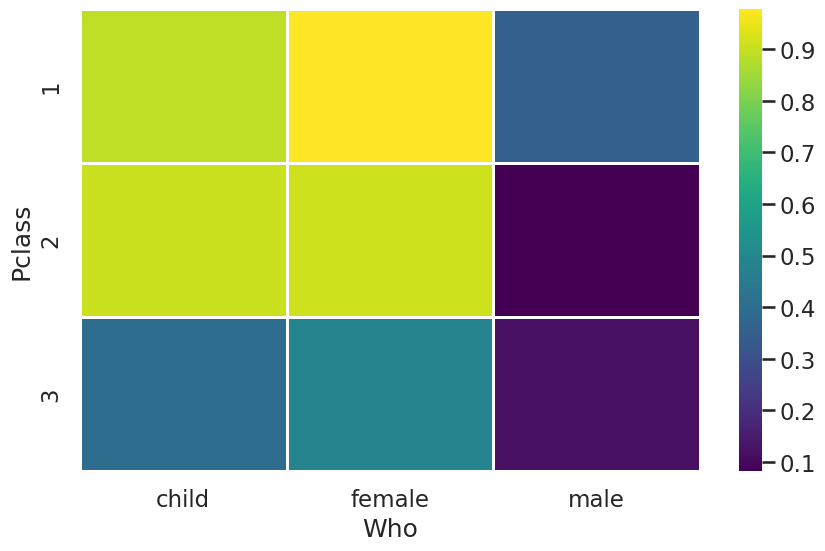

In [27]:
sns.heatmap(matrix,cmap='viridis',linewidths=2)

Lets use it for family size:

<Axes: xlabel='Pclass', ylabel='FamilySize'>

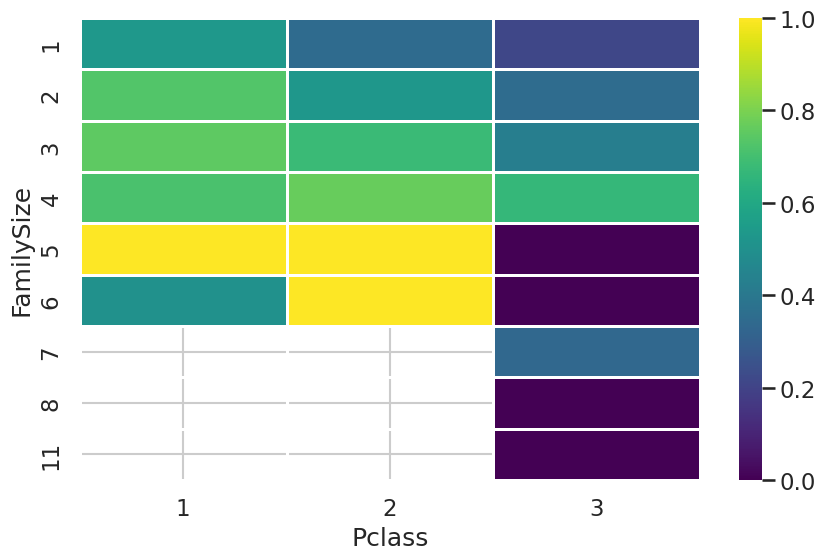

In [28]:
matrix = data.pivot_table( index='FamilySize', columns='Pclass', values='Survived' )
sns.heatmap(matrix,cmap='viridis',linewidths=2)

Try to use it also for the number of survivors w.r.t. Who and Pclass:

Text(79.08333333333331, 0.5, '')

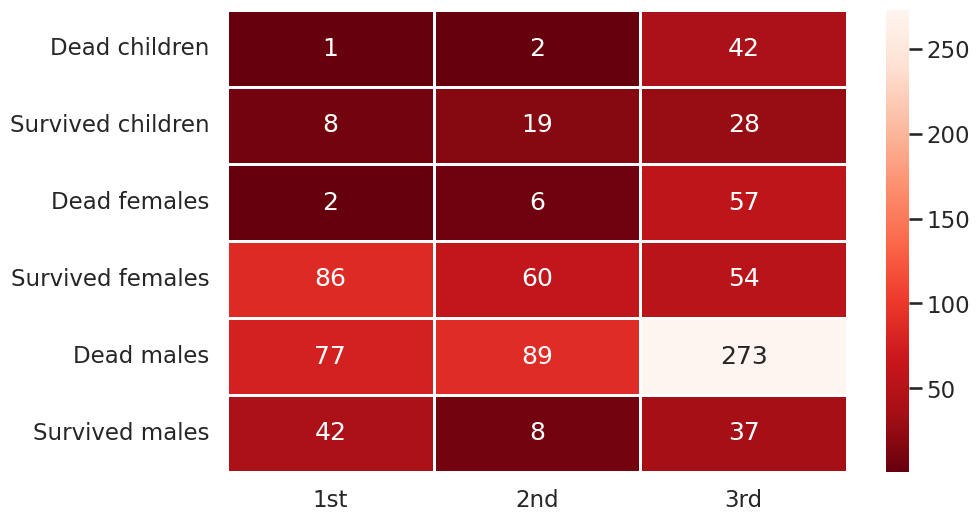

In [29]:
matrix = data.pivot_table( index=['Who','Survived'], columns='Pclass', values='Name', aggfunc='count' )
matrix.head()
sns.heatmap(matrix,cmap='Reds_r',linewidths=2,annot=True, fmt='d',
           yticklabels=['Dead children','Survived children','Dead females','Survived females',
                        'Dead males','Survived males'],
            xticklabels=['1st','2nd','3rd'])
plt.xlabel('')
plt.ylabel('')

## Age and Sex distributions 

How is age distributed among survived/not survived and male/female?

<Axes: xlabel='Sex', ylabel='Age'>

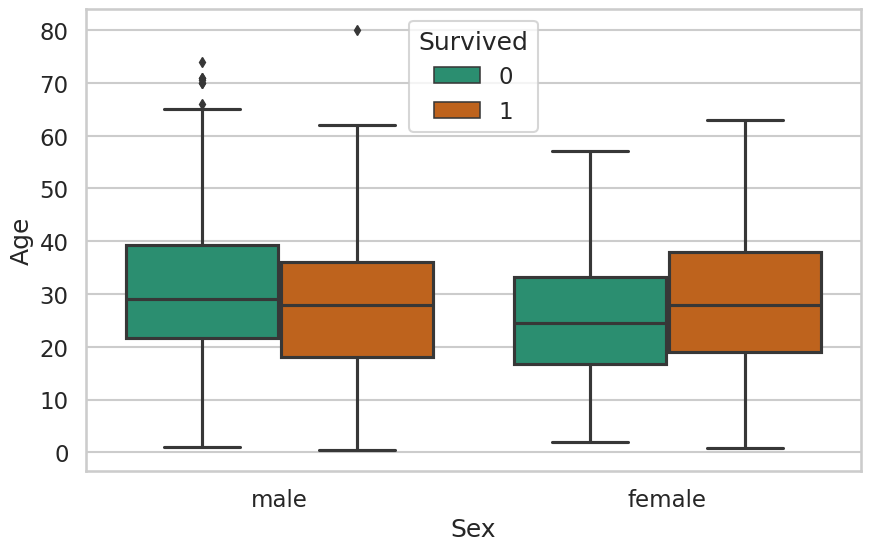

In [30]:
sns.set_palette('Dark2')
sns.boxplot(x='Sex', y='Age', hue='Survived', data=data)

<Axes: xlabel='Sex', ylabel='Age'>

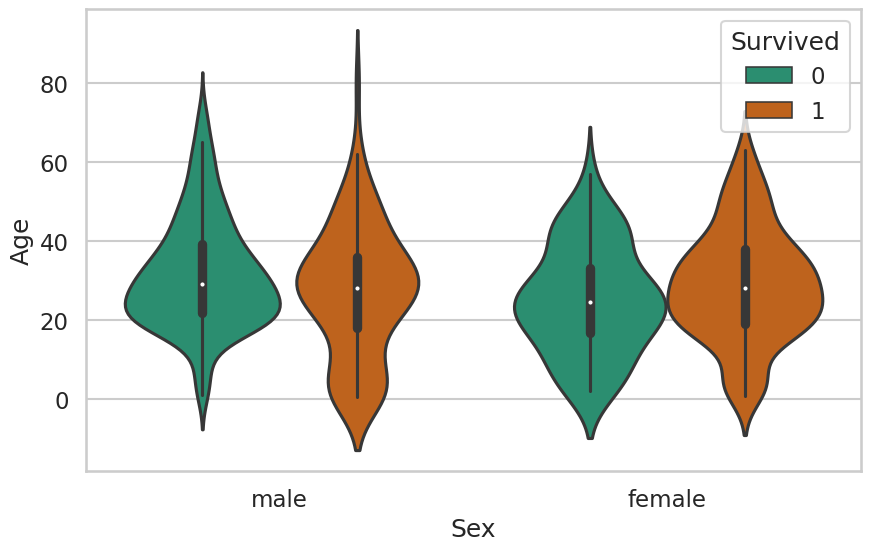

In [31]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data) #see if multimodal

<Axes: xlabel='Age', ylabel='Sex'>

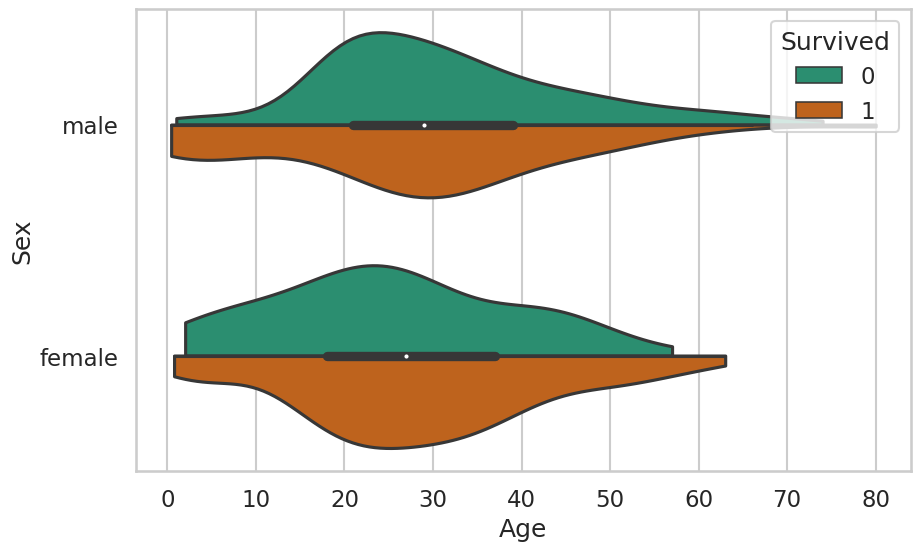

In [32]:
sns.violinplot(y='Sex', x='Age', orient='h', hue='Survived', split=True, data=data, cut=0)

Let's see age distribution more in details among survived and not, using the function [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot):

<ipython-input-33-20c64ad49fea>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data.Survived == 0].Age.dropna(), shade=True, label='Not Survived')
<ipython-input-33-20c64ad49fea>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data.Survived == 1].Age.dropna(), shade=True, label='Survived')


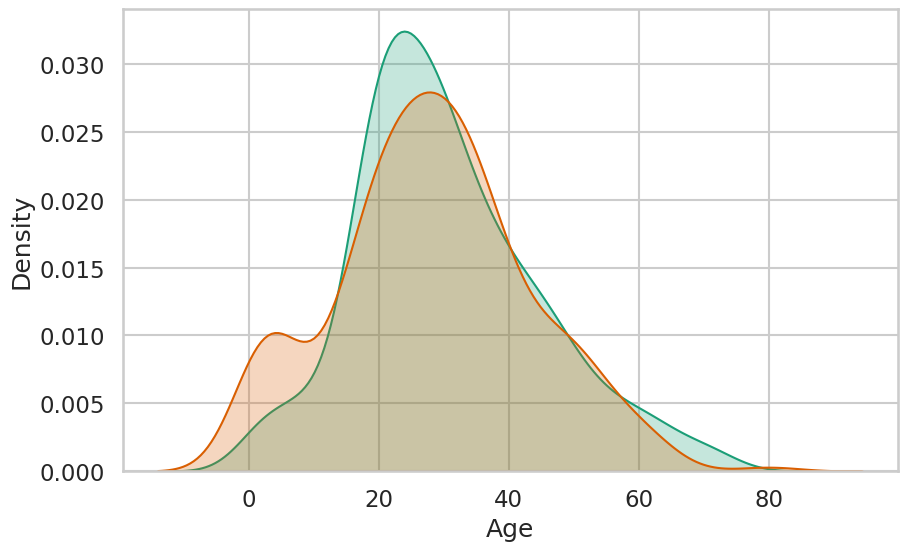

In [33]:

sns.kdeplot(data[data.Survived == 0].Age.dropna(), shade=True, label='Not Survived')
sns.kdeplot(data[data.Survived == 1].Age.dropna(), shade=True, label='Survived')
plt.xlim=(0 , data['Age'].max())